# AR(2)

In [ ]:
import numpy as np
import pymc as pm
from statsmodels.tsa.arima_process import arma_generate_sample
import arviz as az

# Set the seed for reproducibility
np.random.seed(42)

# Generate synthetic ARMA(1, 1) data
n = 1000
ar_coefs = [1, -.6, -.2]
ma_coefs = [1]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=n)

Text(0, 0.5, '$y$')

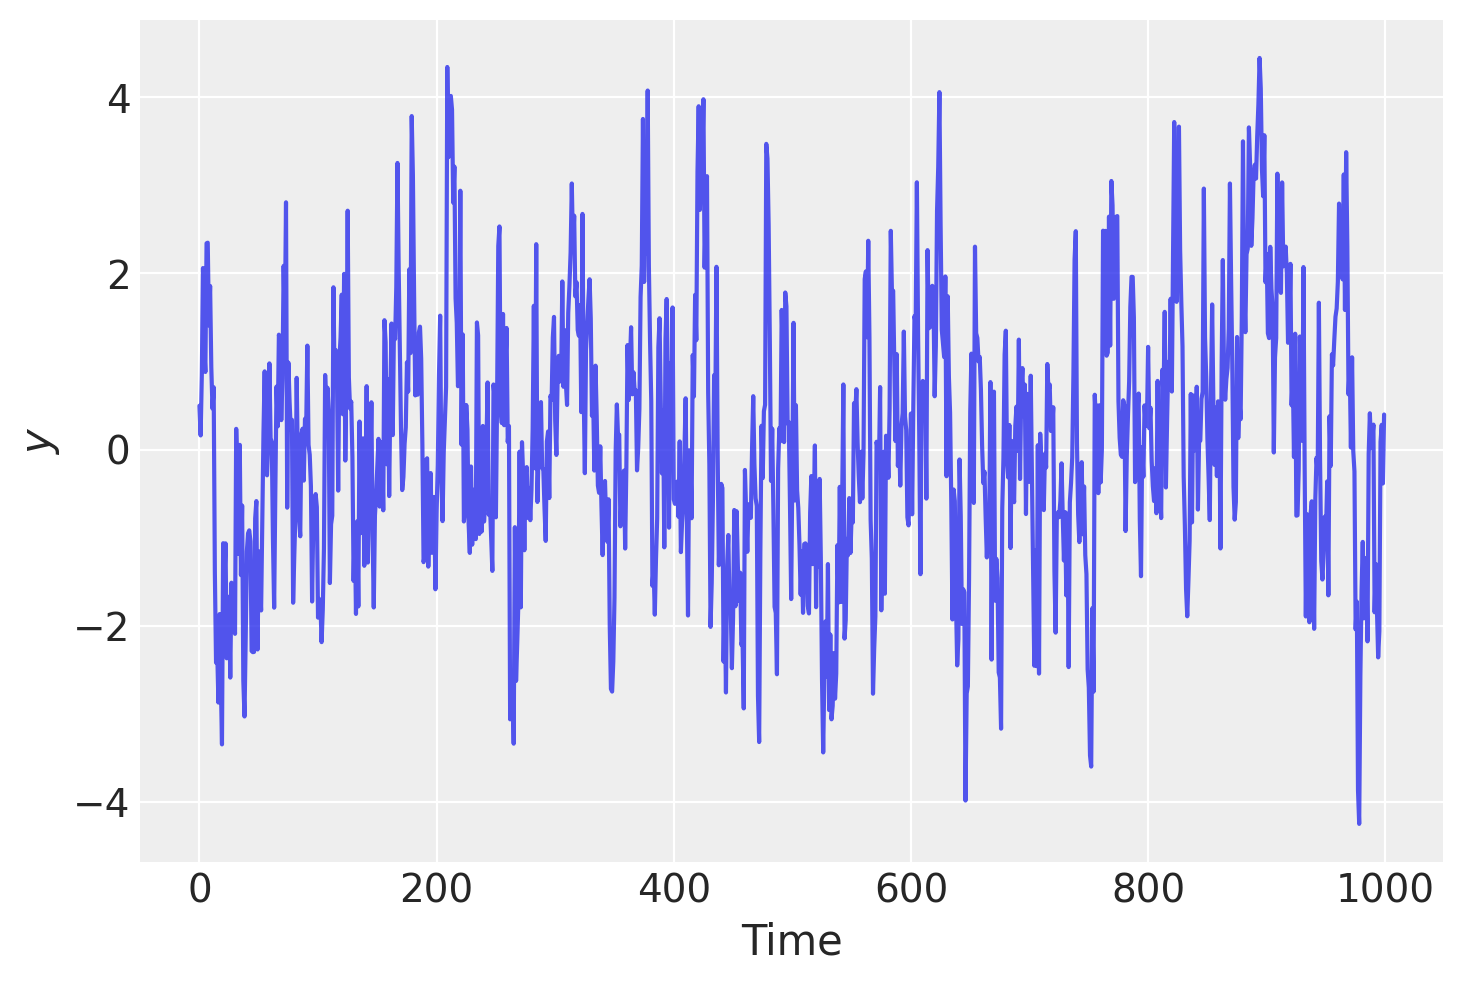

In [ ]:
%config InlineBackend.figure_format = 'retina'

az.style.use("arviz-darkgrid")
import matplotlib.pyplot as plt

plt.plot(y, alpha=0.8)
plt.xlabel("Time")
plt.ylabel(r"$y$")

/Users/wang/Library/CloudStorage/GoogleDrive-thetheoryofeverythingcn@gmail.com/My Drive/23 Spring/TimeSeries/Project/Bayesian-inference/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


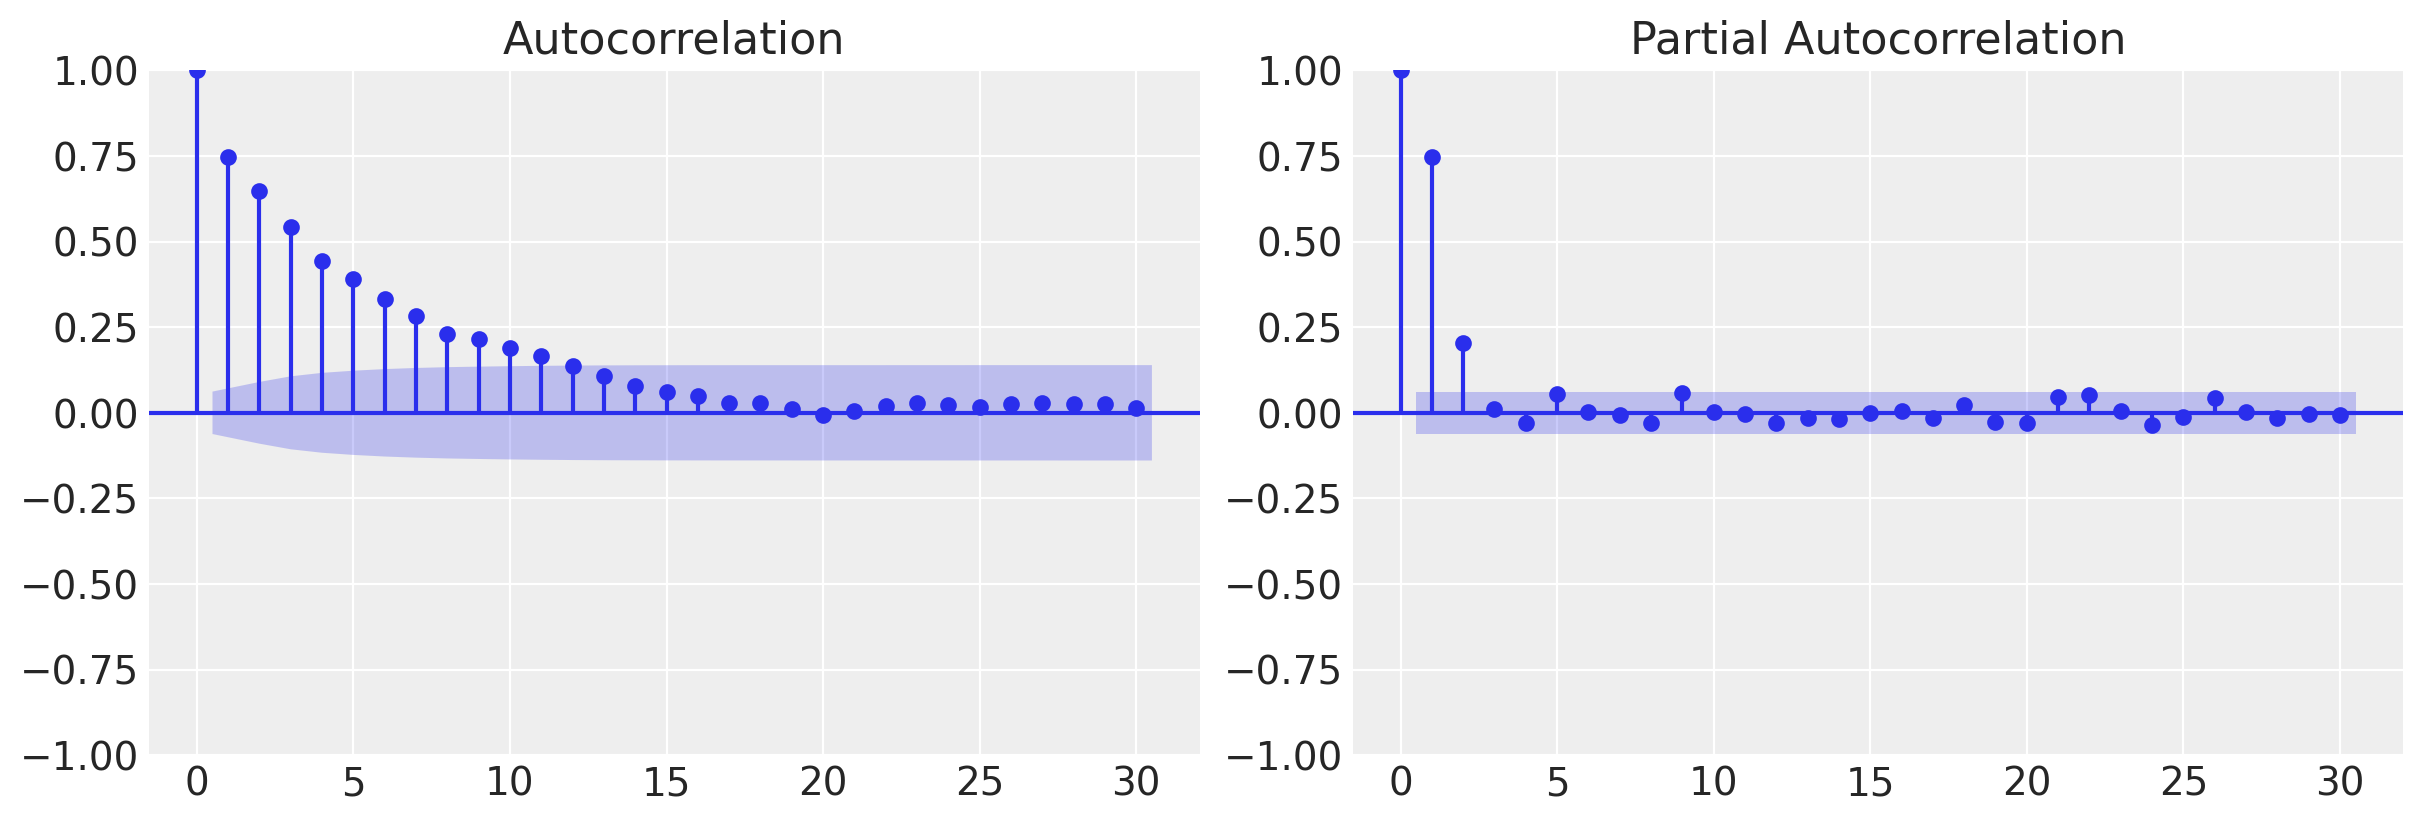

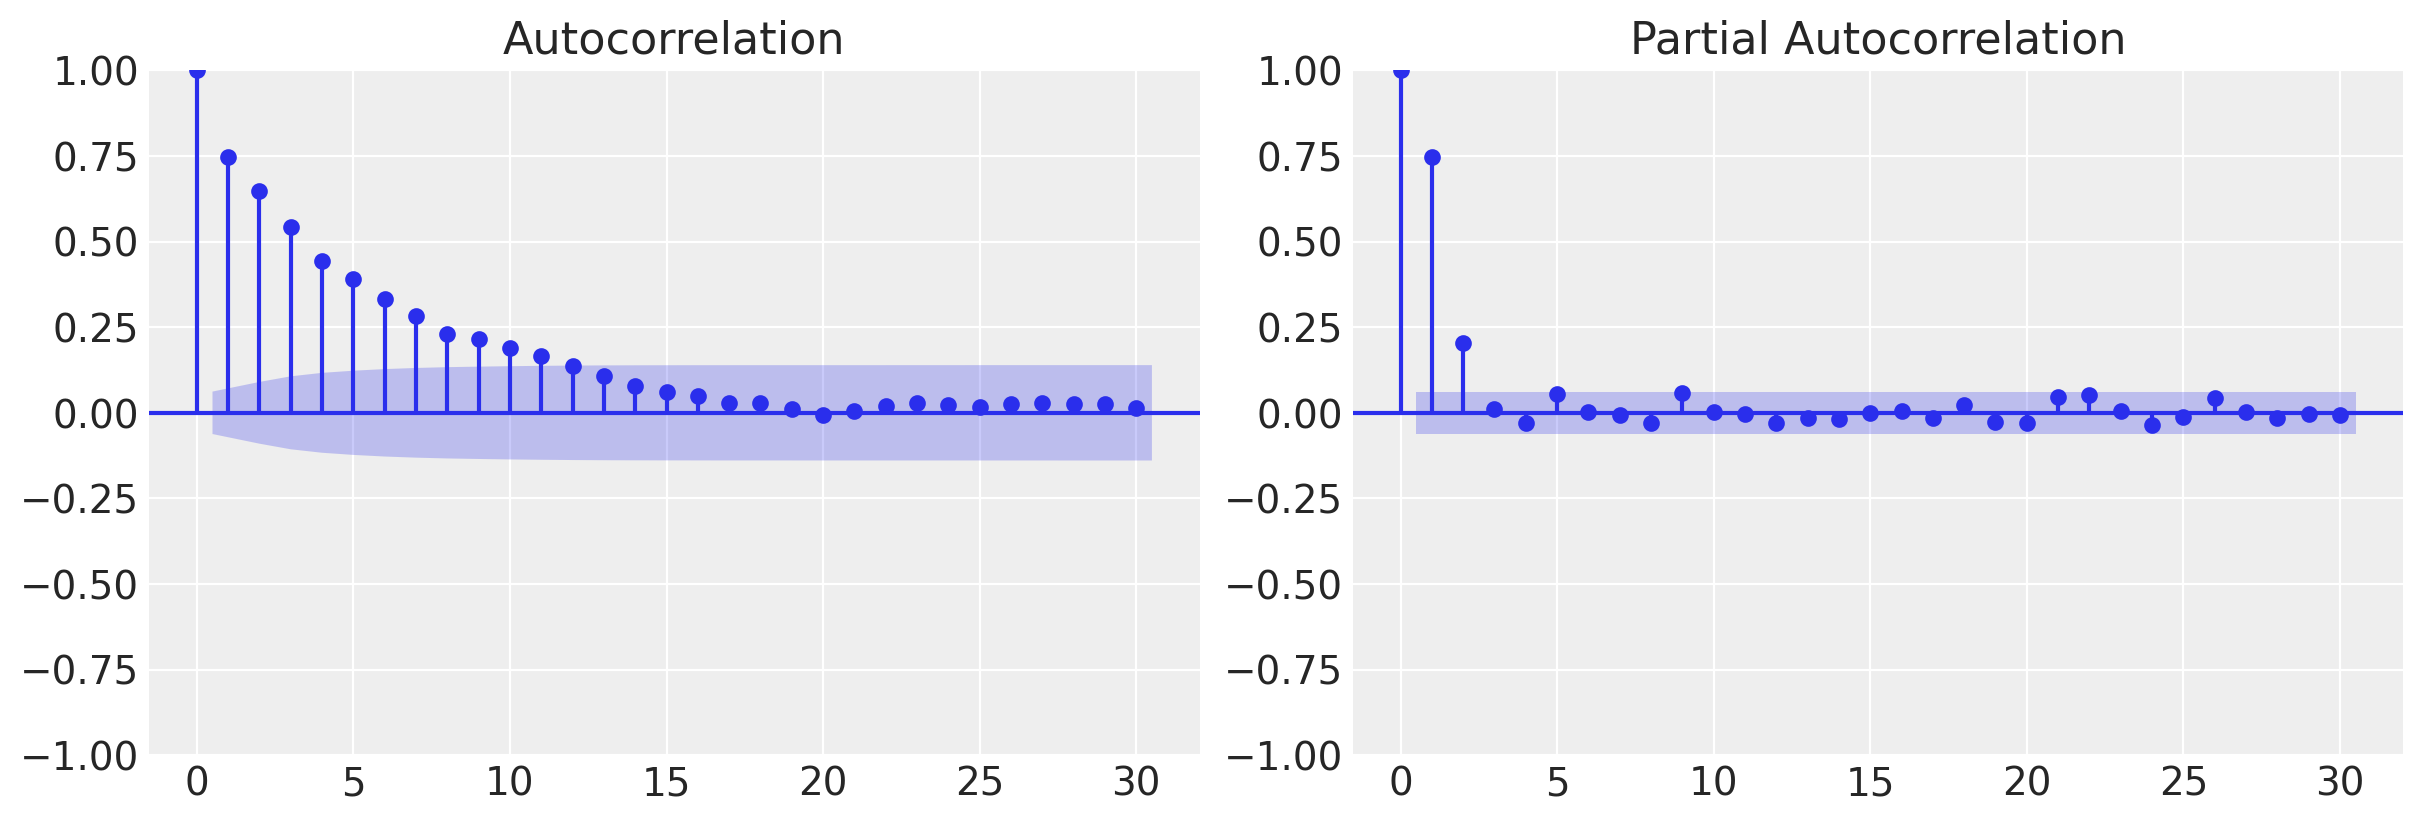

In [ ]:
# plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(y, ax=ax[0])
plot_pacf(y, ax=ax[1])

In [ ]:
with pm.Model() as ar2:
    # assumes 95% of prob mass is between -2 and 2
    rho = pm.Normal("rho", mu=0.0, sigma=1.0, shape=2)
    # precision of the innovation term
    tau = pm.Exponential("tau", lam=0.5)

    likelihood = pm.AR(
        "y", rho=rho, tau=tau, constant=False, init_dist=pm.Normal.dist(0, 10), observed=y
    )

    idata = pm.sample(1000, tune=2000, step=pm.NUTS()) # nuts is the best

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rho, tau]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 17 seconds.


array([[<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'rho'}>, <Axes: title={'center': 'rho'}>]],
      dtype=object)

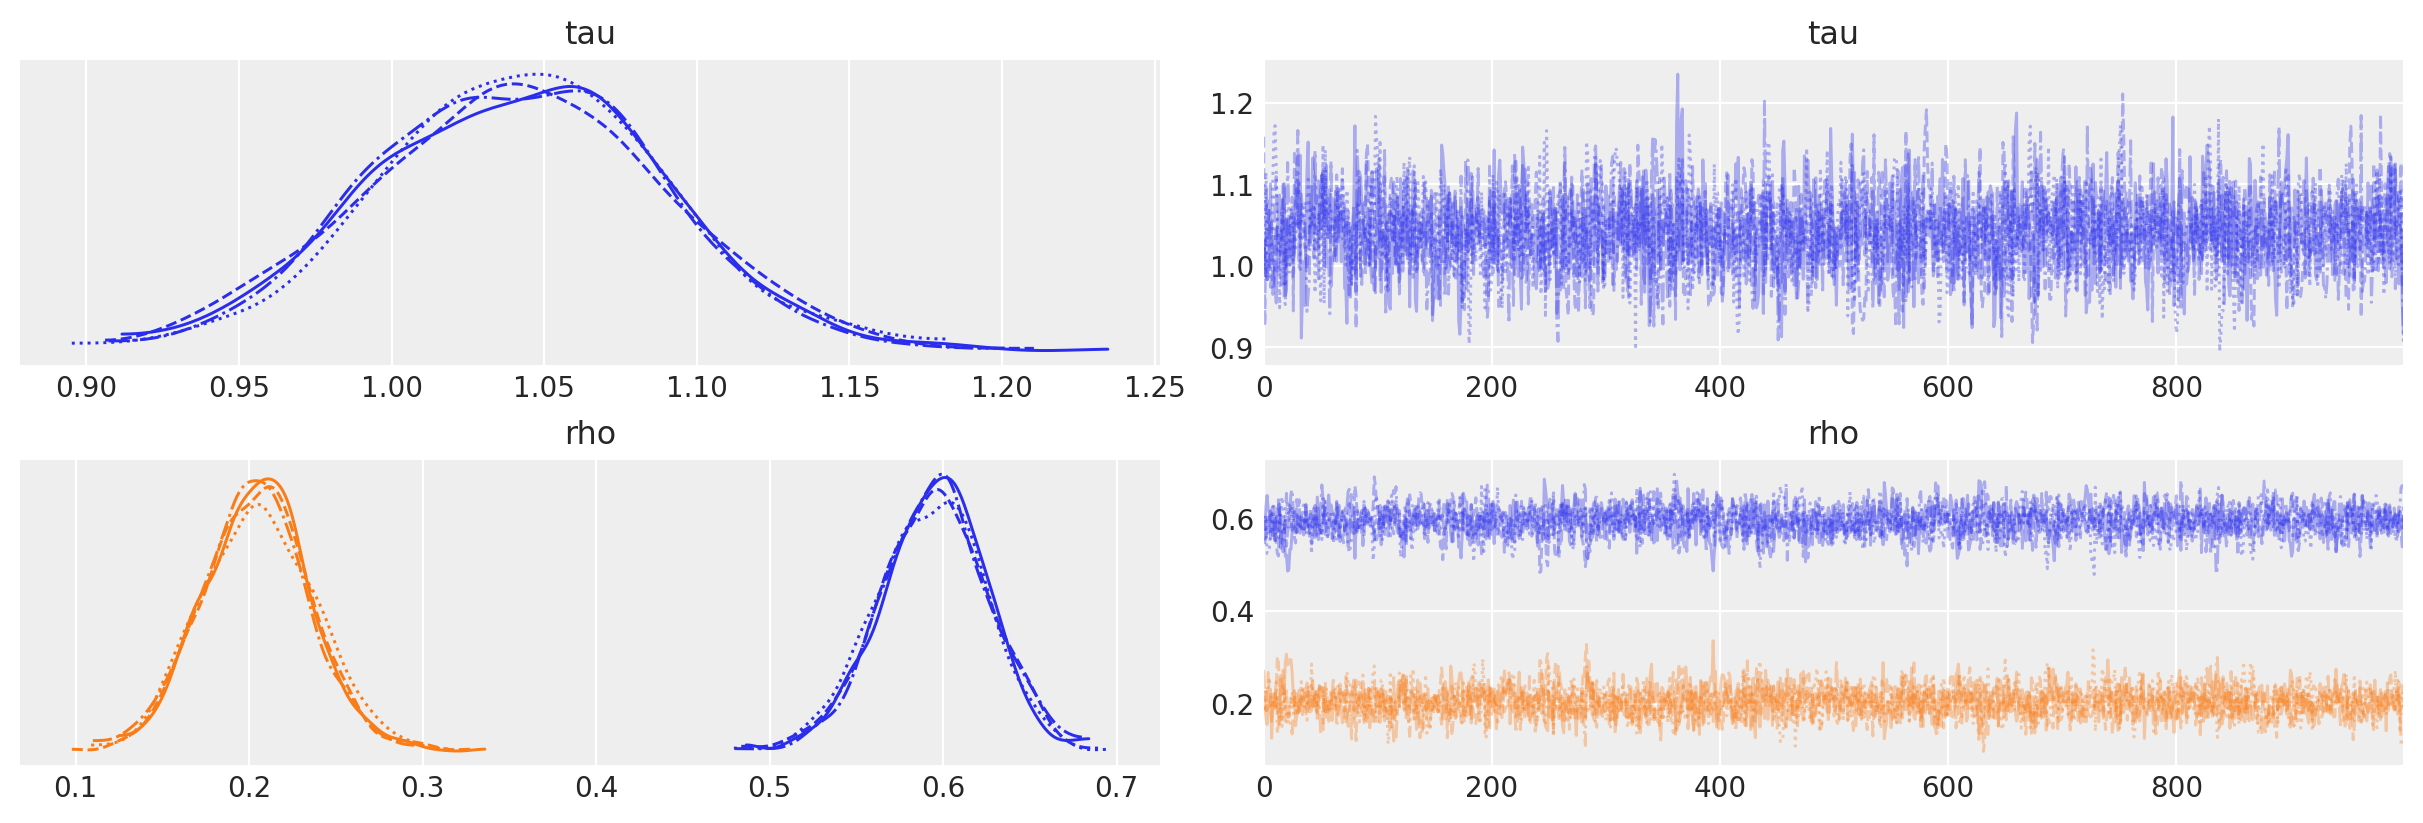

In [ ]:
pm.plot_trace(idata, var_names=["tau", "rho"])

In [ ]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rho[0],0.594,0.031,0.538,0.655,0.001,0.001,1839.0,1957.0,1.0
rho[1],0.205,0.031,0.146,0.262,0.001,0.001,1810.0,2269.0,1.0
tau,1.041,0.048,0.951,1.131,0.001,0.001,2653.0,2542.0,1.0


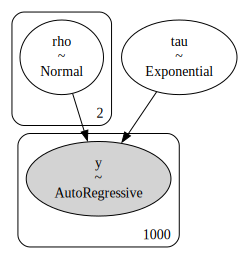

In [ ]:
pm.model_to_graphviz(ar2)

# ARMA(2, 2)

In [ ]:
# generate arma(2, 1) data 
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample


np.random.seed(42)
n = 1000
ar_coefs = np.array([.5, .2])
ma_coefs = np.array([-.3, .3])

y = arma_generate_sample(np.r_[1, -ar_coefs], np.r_[1, ma_coefs], nsample=n)
x = np.arange(n)

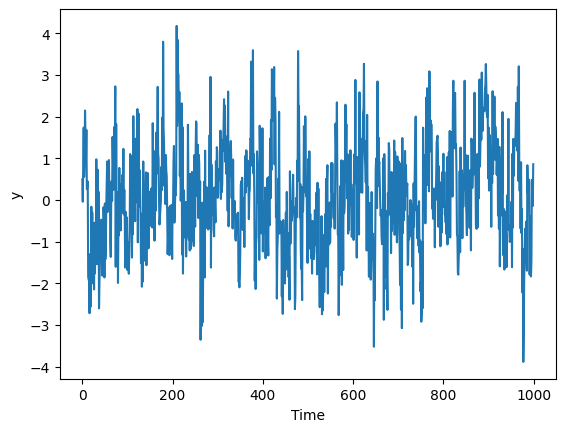

In [ ]:
# plot arma sample
import matplotlib.pyplot as plt
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

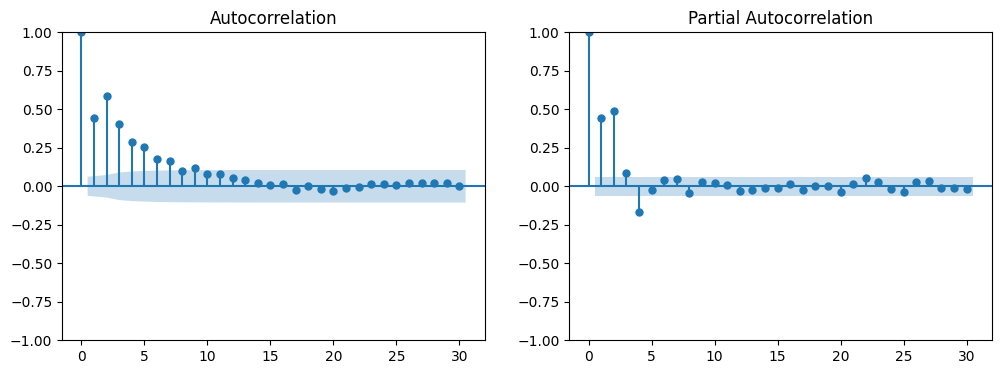

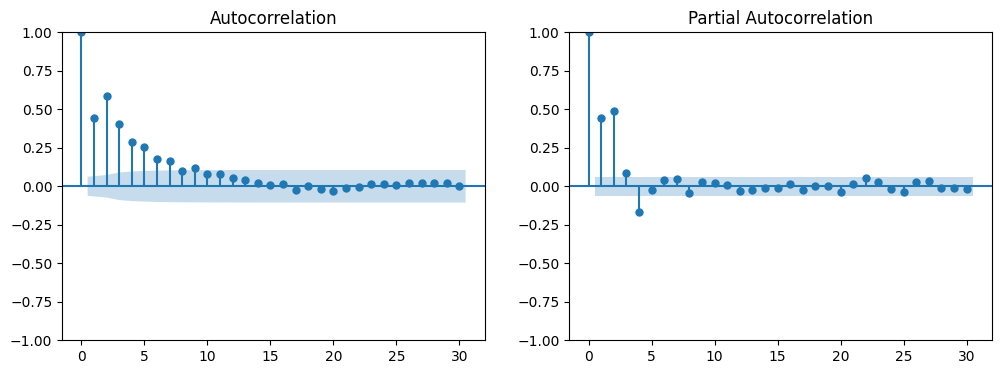

In [ ]:
# plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(y, ax=ax[0])
plot_pacf(y, ax=ax[1], method='ywm')

In [ ]:
# fits the model 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(2, 0, 2), trend='n')

# fit the model but without the constant
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1397.883
Date:                Sat, 22 Apr 2023   AIC                           2805.766
Time:                        20:45:38   BIC                           2830.305
Sample:                             0   HQIC                          2815.093
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4995      0.075      6.704      0.000       0.353       0.646
ar.L2          0.1817      0.070      2.581      0.010       0.044       0.320
ma.L1         -0.3026      0.073     -4.121      0.0

In [ ]:
model.score(model_fit.params)

array([-0.00156359, -0.00614854,  0.00775208,  0.00689543,  0.00609856])

In [ ]:
model = {'order': [2, 2], 'tab': {'params': [0,0,0,0], 'bse': [1,1,1,1]}}
trace = run_MCMC_ARMApq(y, 2000, model)

[0, 0] [1, 1]


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [phi]
>>Metropolis: [theta]
CompoundStep
>CompoundStep
>>Metropolis: [phi]
>>Metropolis: [theta]
>NUTS: [sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
phi[0]    0.396  0.077   0.252    0.527      0.018    0.013      18.0   
phi[1]    0.347  0.056   0.248    0.452      0.012    0.008      24.0   
theta[0] -0.198  0.081  -0.356   -0.058      0.018    0.013      20.0   
theta[1]  0.089  0.041   0.010    0.165      0.002    0.002     370.0   
sigma     0.993  0.022   0.951    1.033      0.000    0.000    3552.0   

          ess_tail  r_hat  
phi[0]       102.0   1.19  
phi[1]       154.0   1.13  
theta[0]     119.0   1.17  
theta[1]     599.0   1.01  
sigma       5551.0   1.00  


array([[<Axes: title={'center': 'phi'}>, <Axes: title={'center': 'phi'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

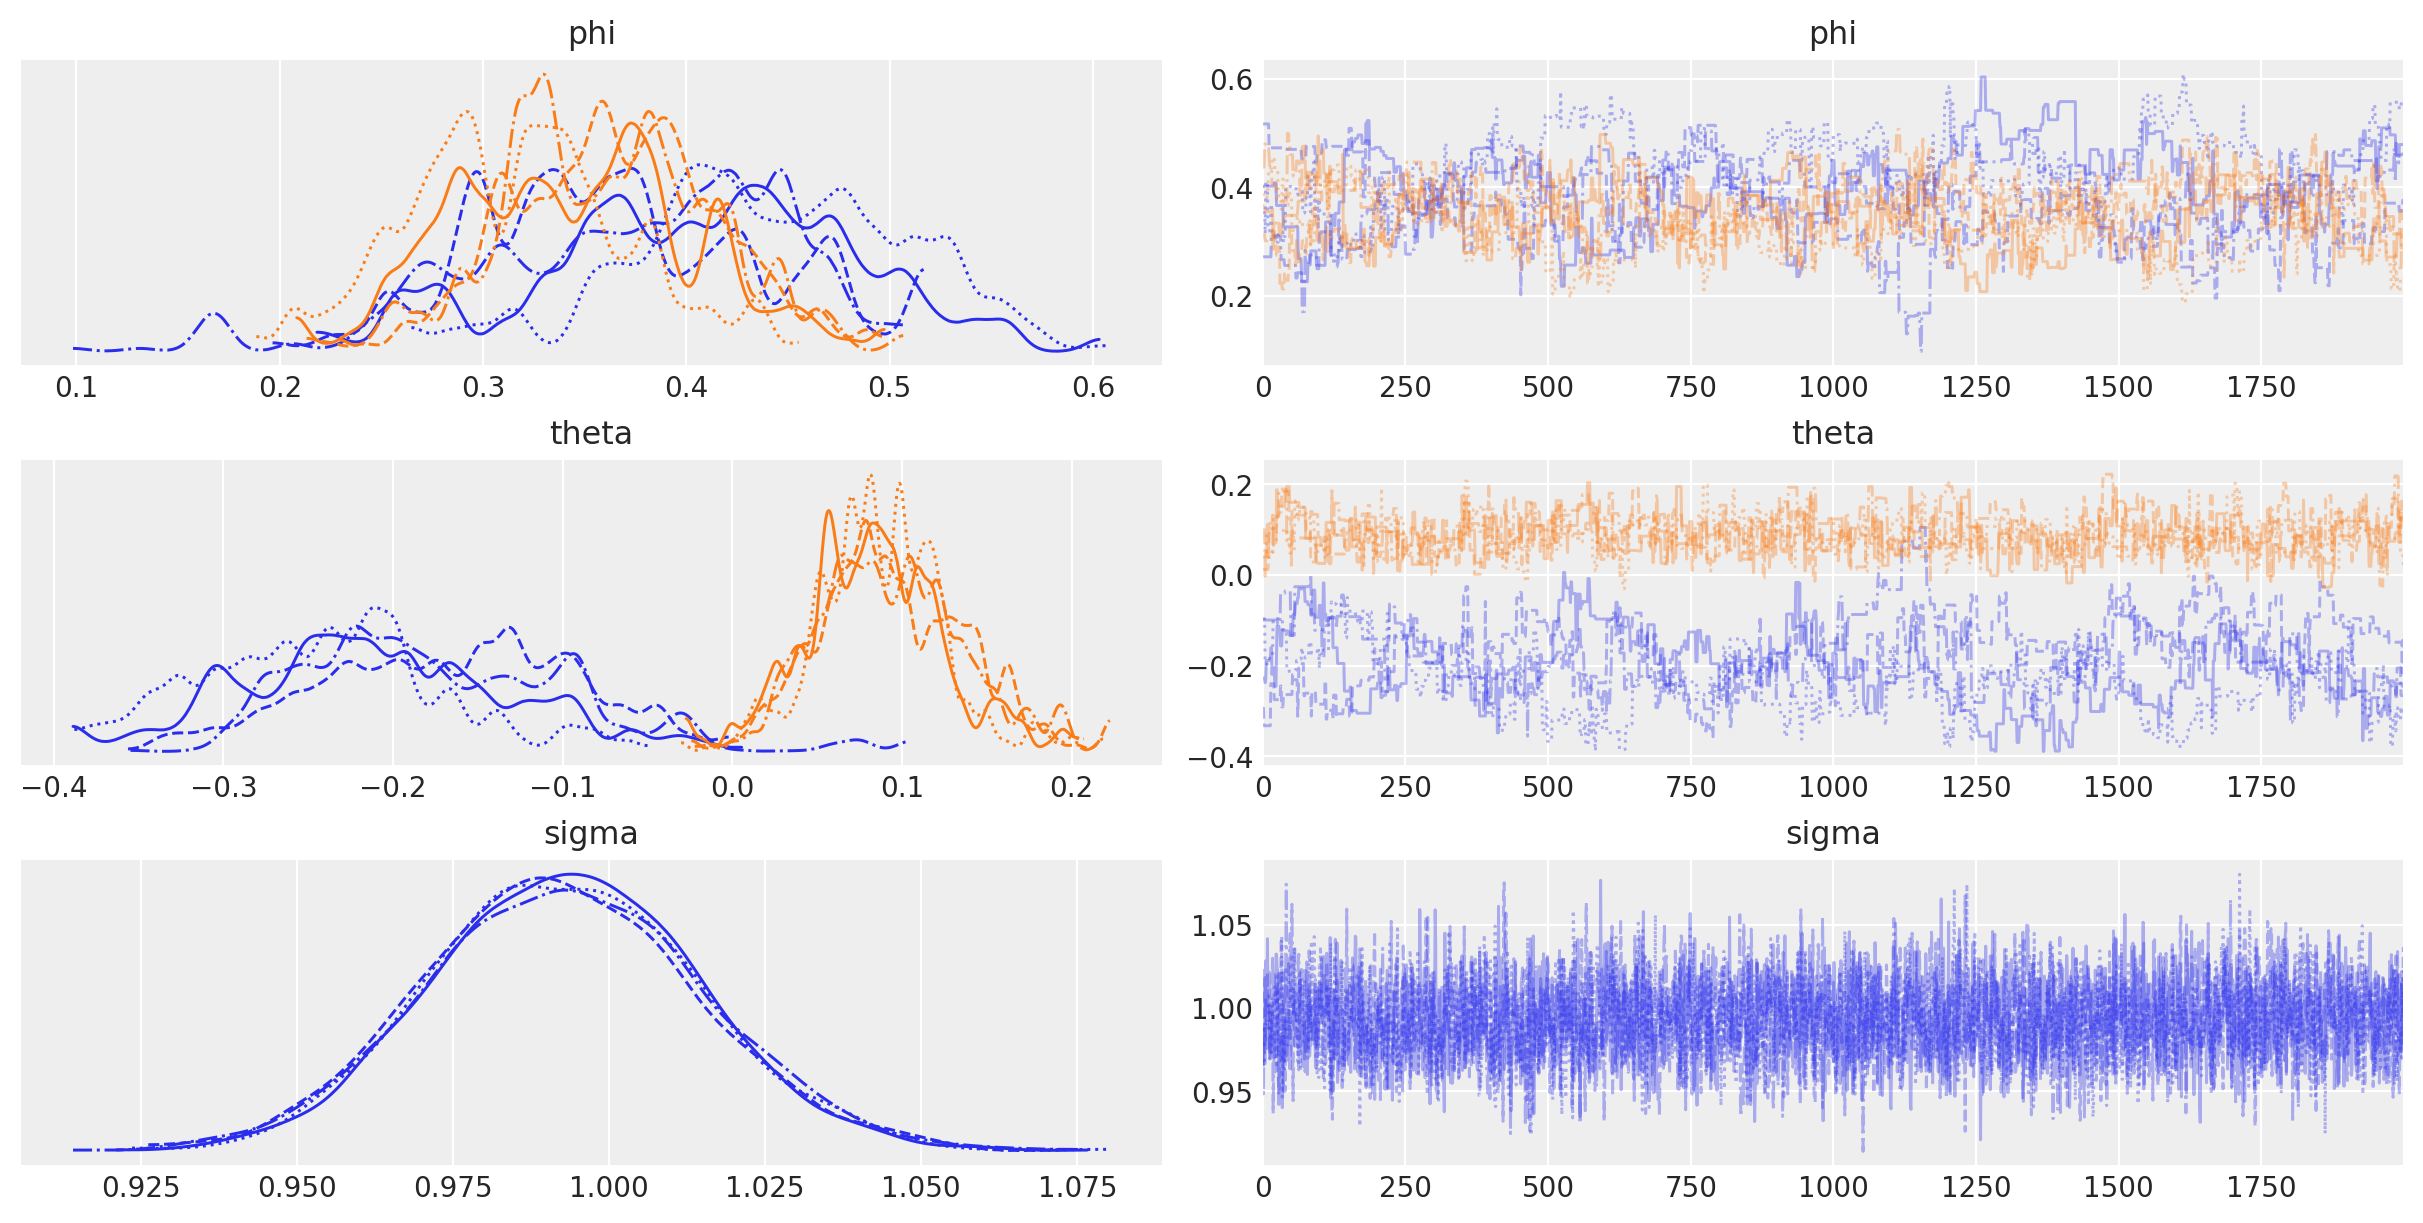

In [ ]:
az.plot_trace(trace, var_names=['phi', 'theta', 'sigma'])

In [ ]:
trace.posterior.phi.shape

(4, 2000, 2)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

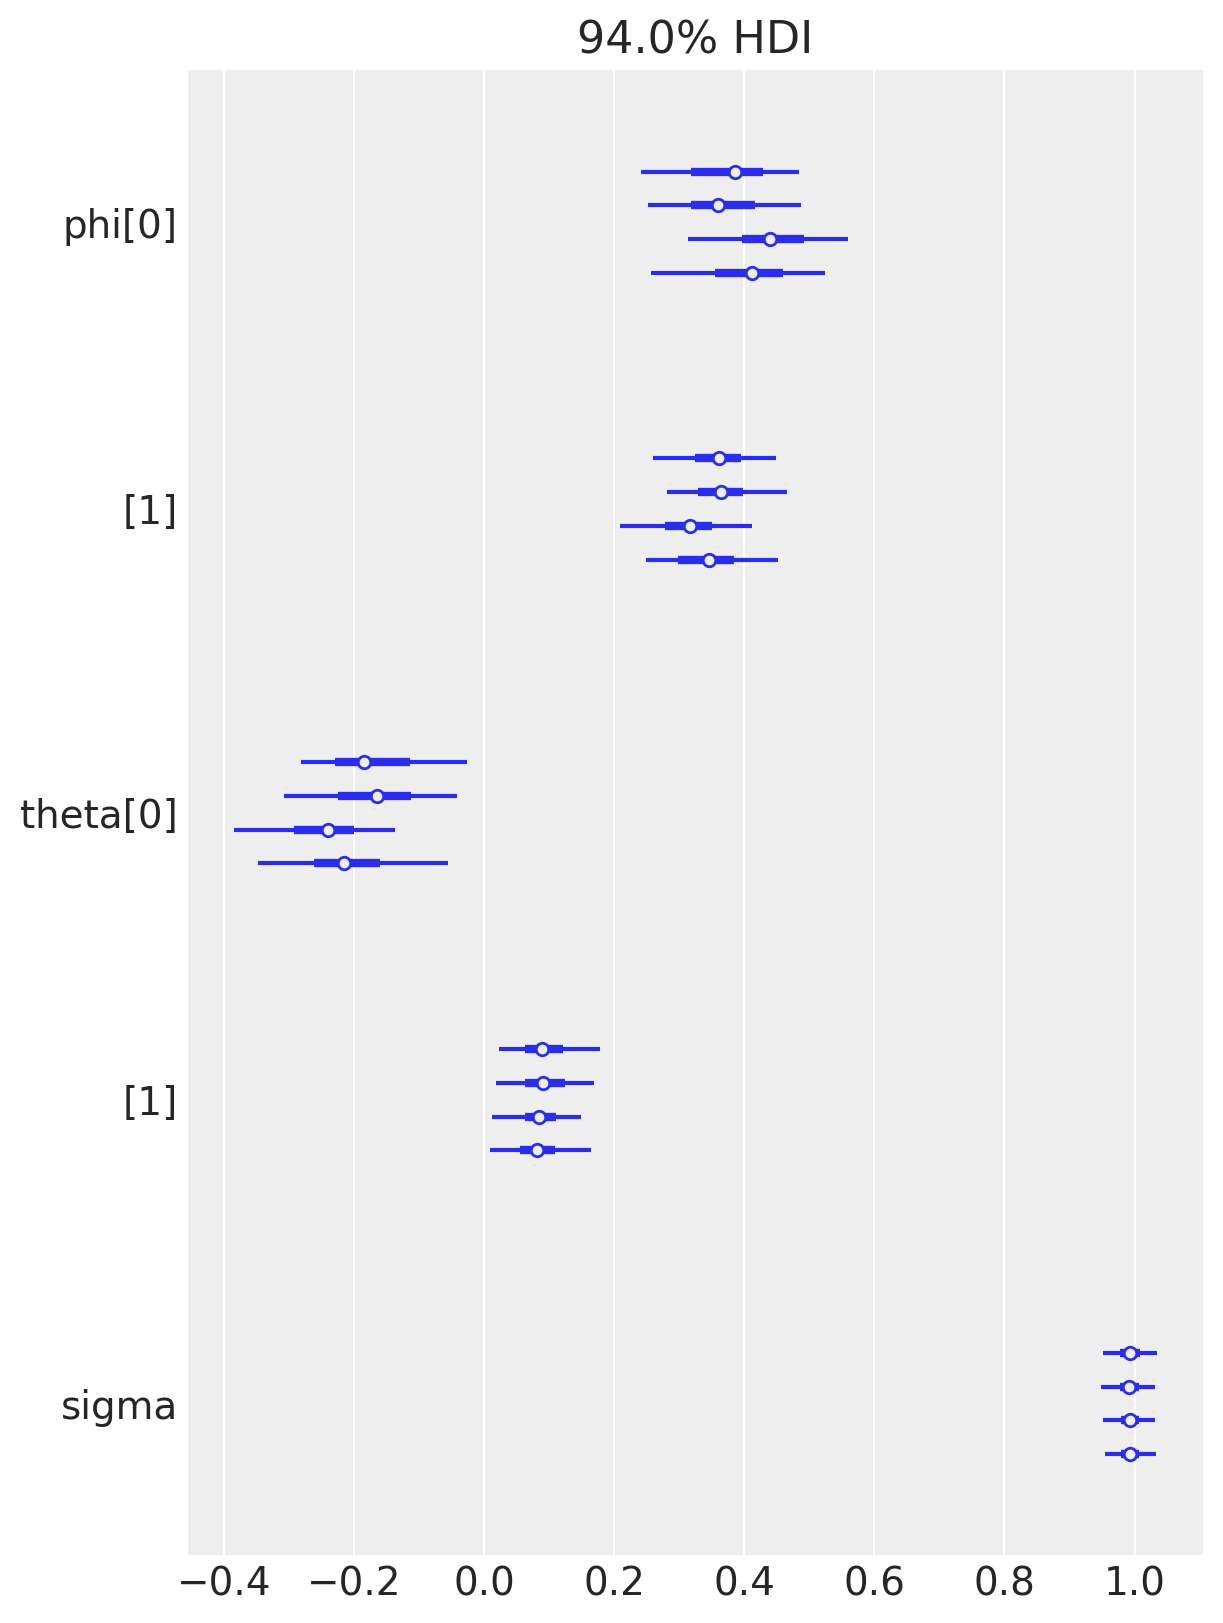

In [ ]:
az.plot_forest(trace, var_names=['phi', 'theta', 'sigma'])

# Alternative ARMA(2, 2)

In [ ]:
np.random.seed(42)
n = 1000
ar_coefs = np.array([.5, .2])
ma_coefs = np.array([-.3, .3])

y = arma_generate_sample(np.r_[1, -ar_coefs], np.r_[1, ma_coefs], nsample=n)
x = np.arange(n)

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y, order=(2, 0, 2))

res_mle = mod.fit(disp=False)
print(res_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1397.883
Date:                Sat, 22 Apr 2023   AIC                           2805.766
Time:                        20:47:04   BIC                           2830.305
Sample:                             0   HQIC                          2815.093
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4995      0.075      6.704      0.000       0.353       0.646
ar.L2          0.1817      0.070      2.581      0.010       0.044       0.320
ma.L1         -0.3026      0.073     -4.121      0.0

In [ ]:
# Set sampling params
ndraws = 3000  # number of draws from the distribution
nburn = 600  # number of "burn-in points" (which will be discarded)

In [ ]:
res_mle.params

array([ 0.49949533,  0.18167066, -0.30255898,  0.32770635,  0.95788707])

In [ ]:
mod.loglike(res_mle.params)

-1397.8831787713798

In [ ]:
mod.score(res_mle.params)

array([-0.00156353, -0.00614851,  0.00775208,  0.00689544,  0.00609855])

In [ ]:
mod.score([0.5,  0.2, -0.3,  0.3,  1]) # plug in the true values

array([ -7.51865801,  -3.75109926,  -0.77019593,  10.66612776,
       -20.86285167])

In [ ]:
hessian = mod.hessian(res_mle.params)
for i in range(hessian.shape[0]):
    print(hessian[i, i])

-1.656977939654969
-1.6568466145569007
-1.175364270669088
-1.12462715788135
-0.5449435656106897


In [ ]:
# fisher information matrix is not implemented
# mod.information(res_mle.params) 

In [ ]:
import pytensor.tensor as tt

class Loglike(tt.Op):
    itypes = [tt.dvector] # parameter vector
    otypes = [tt.dscalar] # log-likelihood scalar

    def __init__(self, model):
        self.model = model
        self.score = Score(self.model) 
    
    def perform(self, node, inputs, outputs):
        theta, = inputs  # contains the vector of parameters
        llf = self.model.loglike(theta)
        outputs[0][0] = np.array(llf)  # output the log-likelihood

    def grad(self, inputs, g):
        return [self.score(inputs[0])]
    

class Score(tt.Op):
    itypes = [tt.dvector] # parameter vector
    otypes = [tt.dvector] # score vector

    def __init__(self, model):
        self.model = model

    def perform(self, node, inputs, outputs):
        (theta,) = inputs
        outputs[0][0] = self.model.score(theta)

In [94]:
# from arma_inference import Loglike
import pymc as pm
import pytensor.tensor as tt
import pandas as pd

loglike = Loglike(mod)


with pm.Model() as m:
    # Priors
    arL1 = pm.Uniform("ar.L1", -0.99, 0.99)
    arL2 = pm.Uniform("ar.L2", -0.99, 0.99)
    maL1 = pm.Uniform("ma.L1", -0.99, 0.99)
    maL2 = pm.Uniform("ma.L2", -0.99, 0.99)
    sigma2 = pm.InverseGamma("sigma2", 2, 4)

    # convert variables to tensor vectors
    params = [arL1, arL2, maL1, maL2, sigma2]

    # Custom likelihood
    pm.CustomDist("likelihood", *params, logp=loglike)

    # Draw samples
    trace = pm.sample(
        ndraws,
        tune=nburn,
        return_inferencedata=True,
        cores=4,
        compute_convergence_checks=False,
    )

ValueError: We expected 1 inputs but got 6.

In [99]:
model = sm.tsa.statespace.SARIMAX(y, order=(2, 0, 2))
model_fit = model.fit(disp=False)

logp = lambda value, *params: model_fit.loglike(params)

In [100]:
y = sm.tsa.arma_generate_sample([1, -0.5, 0.2], [1, 0.3, -0.3], 1000)

In [102]:
np.random.seed(42)
n = 1000
ar_coefs = np.array([.5, .2])
ma_coefs = np.array([-.3, .3])

y = arma_generate_sample(np.r_[1, -ar_coefs], np.r_[1, ma_coefs], nsample=n)
x = np.arange(n)

In [103]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y, order=(2, 0, 2))

res_mle = mod.fit(disp=False)
print(res_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1397.883
Date:                Sat, 22 Apr 2023   AIC                           2805.766
Time:                        18:44:38   BIC                           2830.305
Sample:                             0   HQIC                          2815.093
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4995      0.075      6.704      0.000       0.353       0.646
ar.L2          0.1817      0.070      2.581      0.010       0.044       0.320
ma.L1         -0.3026      0.073     -4.121      0.0